#Analyzing Factors Impacting Medical Charges: Statistical Inference and Regression Analysis of Medical Charges


In Part 2 of analysis, focuses on Statistical Inferencing and Random forest classification and train/test split.

Performed comprehensive statistical analysis on insurance data to uncover key insights and patterns. Conducted correlation analysis, tests on gender, age brackets, and BMI distribution, and evaluated the normality of medical charges. Developed separate regression models for smokers and non-smokers, demonstrating strong predictive performance for smokers and identifying additional influential factors for non-smokers. Expertise in data visualization, influential point analysis, and evaluating model accuracy through residuals.


The project aims to provide a comprehensive understanding of the insurance dataset and develop a robust model for predicting medical charges. This information can be valuable in developing targeted strategies for cost management and healthcare planning based on smoking status.



# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load CSV to DF

In [ ]:
df= pd.read_csv('insurance.csv')

#Statistical Inferencing

In [ ]:
#Feature Selection
X = df[['age', 'bmi', 'children']]
X = sm.add_constant(X)
y = df['charges']


Correlation Analysis:

The correlation matrix shows the correlation coefficients between age, bmi, children, and charges.

In [ ]:
# Correlation analysis using linear regression
correlation = df[['age', 'bmi', 'children', 'charges']].corr()
print("Correlation Analysis:")
print(correlation)

Correlation Analysis:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Test 1 - Gender and Medical Charges:

The chi-square test assesses the statistical relationship between gender and medical charges.

In [ ]:
# Test 1: Is there a statistical relationship between gender and medical charges?
gender_charges_table = pd.crosstab(df['sex'], df['charges'])
gender_charges_test = stats.chisquare(gender_charges_table)
print("\nTest 1 - Gender and Medical Charges:")
print("Gender-Charges Distribution:")
print(gender_charges_table)
print("Chi-square test statistic:", gender_charges_test.statistic)
print("p-value:", gender_charges_test.pvalue)



Test 1 - Gender and Medical Charges:
Gender-Charges Distribution:
charges  1121.87390   1131.50660   1135.94070   1136.39940   1137.01100   \
sex                                                                        
female             0            0            0            0            0   
male               1            1            1            1            1   

charges  1137.46970   1141.44510   1146.79660   1149.39590   1163.46270   ...  \
sex                                                                       ...   
female             0            0            0            0            0  ...   
male               1            1            1            1            1  ...   

charges  48885.13561  48970.24760  49577.66240  51194.55914  52590.82939  \
sex                                                                        
female             1            0            0            0            0   
male               0            1            1            1            1   

Test 2 - Age Brackets and Medical Charges:

The linear regression analysis evaluates the correlation between age brackets and charges.

In [ ]:
# Test 2: Is there a strong statistically significant correlation between age brackets?
age_brackets = pd.cut(df['age'], bins=[0, 20, 40, 60, float('inf')], labels=['<20', '20-40', '40-60', '60+'])
age_brackets_charges = df.groupby(age_brackets)['charges'].mean()
age_brackets_correlation = stats.linregress(df['age'], df['charges'])
print("\nTest 2 - Age Brackets and Medical Charges:")
print("Age-Brackets Charges Relationship:")
print(age_brackets_charges)
print("Correlation coefficient:", age_brackets_correlation.rvalue)
print("p-value:", age_brackets_correlation.pvalue)


Test 2 - Age Brackets and Medical Charges:
Age-Brackets Charges Relationship:
age
<20       8713.482413
20-40    10686.686643
40-60    15888.757668
60+      21063.163398
Name: charges, dtype: float64
Correlation coefficient: 0.2990081933306476
p-value: 4.886693331718841e-29


Test 3 - BMI Distribution within Gender:

The chi-square test examines the relationship between BMI distribution and gender.

In [ ]:
# Test 3: BMI distribution or relationship within gender
bmi_gender_table = pd.crosstab(df['bmi'], df['sex'])
bmi_gender_test = stats.chisquare(bmi_gender_table)
print("\nTest 3 - BMI Distribution within Gender:")
print("BMI-Gender Distribution:")
print(bmi_gender_table)
print("Chi-square test statistic:", bmi_gender_test.statistic)
print("p-value:", bmi_gender_test.pvalue)


Test 3 - BMI Distribution within Gender:
BMI-Gender Distribution:
sex     female  male
bmi                 
15.960       0     1
16.815       1     1
17.195       1     0
17.290       2     1
17.385       0     1
...        ...   ...
48.070       1     0
49.060       0     1
50.380       0     1
52.580       0     1
53.130       0     1

[548 rows x 2 columns]
Chi-square test statistic: [541.61329305 664.81656805]
p-value: [5.56943217e-01 3.98113698e-04]


The normality test assesses whether the distribution of medical charges follows a normal distribution.
The plot allows us to visually assess the normality of the 'charges' variable. If the histogram aligns well with the bell curve, it supports the assumption of normality.

In [ ]:
# Normality test
normality_test = stats.normaltest(df['charges'])
mean = np.mean(df['charges'])
std = np.std(df['charges'])

print("\nNormality Test:")
print("Test statistic:", normality_test.statistic)
print("p-value:", normality_test.pvalue)


Normality Test:
Test statistic: 336.8851220567733
p-value: 7.019807901276197e-74


In [ ]:
# Generate data for the bell curve
x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = stats.norm.pdf(x, mean, std)

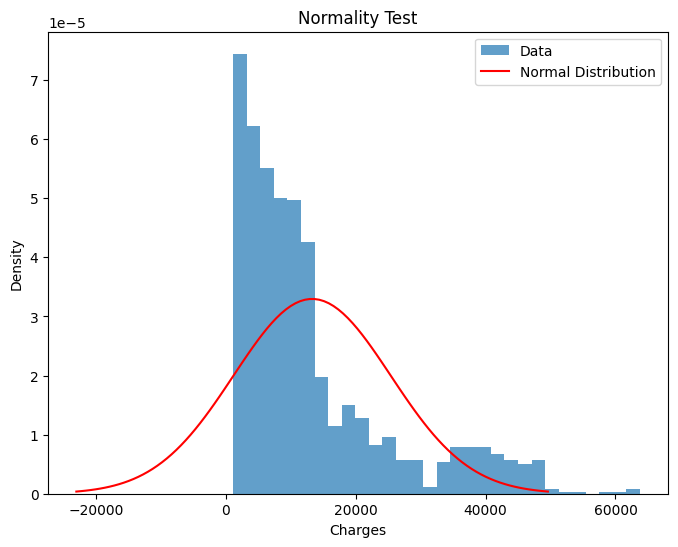

In [ ]:
# Plot the histogram and the bell curve
plt.figure(figsize=(8, 6))
plt.hist(df['charges'], bins=30, density=True, alpha=0.7, label='Data')
plt.plot(x, y, 'r-', label='Normal Distribution')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Normality Test')
plt.legend()
plt.show()

Influential Points:

Identifying influential points helps understand the observations that have a significant impact on the model's results or assumptions.

In [ ]:
# Influential points using OLS
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
influence = model.get_influence()
influential_points = model.get_influence().summary_frame()
print("\nInfluential Points:")
print(influential_points)



Influential Points:
      dfb_const   dfb_age   dfb_bmi  dfb_children   cooks_d  standard_resid  \
0      0.030072 -0.032742 -0.006998     -0.020343  0.000560        0.878503   
1     -0.006354  0.028187 -0.012165      0.000362  0.000300       -0.654733   
2      0.000796  0.017443 -0.008812     -0.030880  0.000409       -0.699483   
3      0.051061 -0.008569 -0.040748     -0.028525  0.000937        1.183479   
4     -0.011683  0.006981  0.003602      0.013831  0.000128       -0.570894   
...         ...       ...       ...           ...       ...             ...   
1333   0.005863 -0.010837  0.000718     -0.023898  0.000237       -0.563272   
1334  -0.010084  0.021040 -0.005315      0.011857  0.000202       -0.510605   
1335  -0.000738  0.030815 -0.023082      0.016529  0.000507       -0.705869   
1336  -0.016763  0.013323  0.007372      0.009583  0.000122       -0.412420   
1337  -0.002711  0.046215 -0.012077     -0.027580  0.000914        1.036225   

      hat_diag  dffits_interna

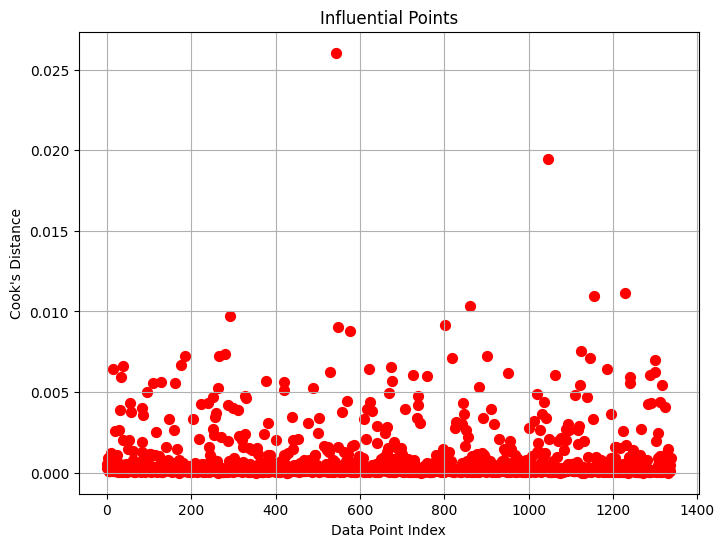

In [ ]:
# Plot influential points
plt.figure(figsize=(8, 6))
plt.scatter(df.index, influential_points['cooks_d'], s=50, c='r')
plt.xlabel('Data Point Index')
plt.ylabel("Cook's Distance")
plt.title('Influential Points')
plt.grid(True)
plt.show()

Residual Correlation Analysis:

The residual correlation analysis measures the correlation between consecutive residuals in the model.

In [ ]:
# Residual correlation analysis
model = sm.OLS(y, X).fit()
residuals = model.resid
residual_corr = stats.pearsonr(residuals[:-1], residuals[1:])
print("\nResidual Correlation Analysis:")
print("Correlation coefficient:", residual_corr[0])
print("p-value:", residual_corr[1])


Residual Correlation Analysis:
Correlation coefficient: -0.0066420649180420985
p-value: 0.8082822080480493


In [ ]:
# Compute residual correlation
residual_corr = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]


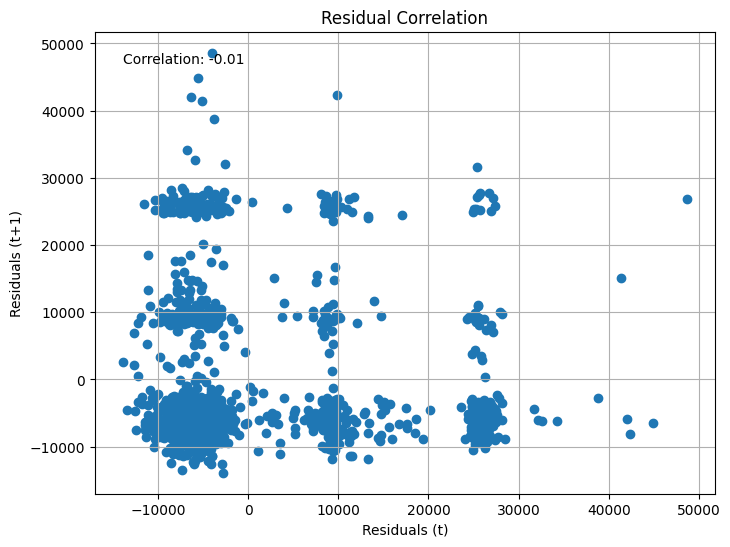

In [ ]:
# Plot residual correlation
plt.figure(figsize=(8, 6))
plt.scatter(residuals[:-1], residuals[1:])
plt.xlabel('Residuals (t)')
plt.ylabel('Residuals (t+1)')
plt.title('Residual Correlation')
plt.text(np.min(residuals[:-1]), np.max(residuals[1:]), f'Correlation: {residual_corr:.2f}', ha='left', va='top')
plt.grid(True)
plt.show()

#Pre-Processing for Train Split/Test
This is necessary to transform the original dataset into a format suitable for training a machine learning model. It ensures that the input variables are in a numerical format and includes all the relevant features needed for the analysis

In [ ]:
smoker_dummies = pd.get_dummies(df['smoker'], prefix='smoker', drop_first=True)
X = pd.concat([X, smoker_dummies], axis=1)

In [ ]:
# Print the preprocessed data
print("Preprocessed data:")
print(X.head())
print(y.head())

Preprocessed data:
   age     bmi  children  smoker_yes
0   19  27.900         0           1
1   18  33.770         1           0
2   28  33.000         3           0
3   33  22.705         0           0
4   32  28.880         0           0
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64



#Random Forest classification and train/test split


In [ ]:
# Split the data into training and test sets for smokers
X_smokers = X[X['smoker_yes'] == 1]
y_smokers = y[X['smoker_yes'] == 1]
X_smokers_train, X_smokers_test, y_smokers_train, y_smokers_test = train_test_split(X_smokers, y_smokers, test_size=0.3, random_state=42)

In [ ]:

# Split the data into training and test sets for non-smokers
X_non_smokers = X[X['smoker_yes'] == 0]
y_non_smokers = y[X['smoker_yes'] == 0]
X_non_smokers_train, X_non_smokers_test, y_non_smokers_train, y_non_smokers_test = train_test_split(X_non_smokers, y_non_smokers, test_size=0.3, random_state=42)



# Random Forest Regressor for Smokers and Non-Smokers

In [ ]:
# Train separate models for smokers and non-smokers
rf_reg_smokers = RandomForestRegressor(random_state=42)
rf_reg_smokers.fit(X_smokers_train, y_smokers_train)

rf_reg_non_smokers = RandomForestRegressor(random_state=42)
rf_reg_non_smokers.fit(X_non_smokers_train, y_non_smokers_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict charges for smokers and non-smokers
predicted_charges_smokers = rf_reg_smokers.predict(X_smokers_test)
predicted_charges_non_smokers = rf_reg_non_smokers.predict(X_non_smokers_test)



#Model Evaluation

In [ ]:
# Model evaluation for smokers
print("Model Evaluation for Smokers:")
print("Mean Absolute Error:", mean_absolute_error(y_smokers_test, predicted_charges_smokers))
print("Mean Squared Error:", mean_squared_error(y_smokers_test, predicted_charges_smokers))
print("R2 Score:", r2_score(y_smokers_test, predicted_charges_smokers))


Model Evaluation for Smokers:
Mean Absolute Error: 2118.6447837469887
Mean Squared Error: 19761994.125977438
R2 Score: 0.8655143565597837


In [ ]:
# Model evaluation for non-smokers
print("\nModel Evaluation for Non-Smokers:")
print("Mean Absolute Error:", mean_absolute_error(y_non_smokers_test, predicted_charges_non_smokers))
print("Mean Squared Error:", mean_squared_error(y_non_smokers_test, predicted_charges_non_smokers))
print("R2 Score:", r2_score(y_non_smokers_test, predicted_charges_non_smokers))



Model Evaluation for Non-Smokers:
Mean Absolute Error: 2832.7721739391504
Mean Squared Error: 23767274.20972563
R2 Score: 0.3135310143882263


#Scatter Plot on Actual Vs Predicted Charges for Smokers

This presents a scatter plot that compares the actual charges with the predicted charges for the test set of smokers. Each point represents an observation (individual) and its corresponding actual and predicted charge values. The blue dots represent the actual charges while the red dots represent the predicted charges. 

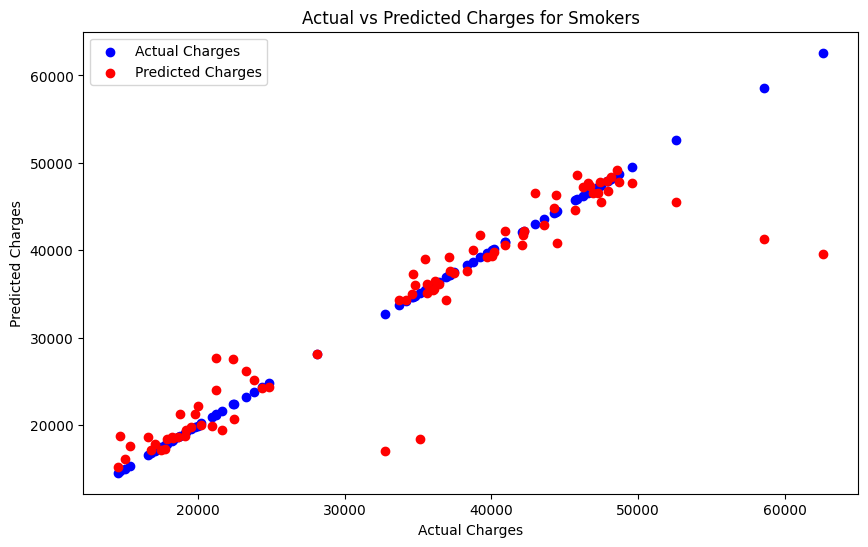

In [ ]:
#Scatter Plot on Actual Vs Predicted Charges for Smokers
plt.figure(figsize=(10, 6))
plt.scatter(y_smokers_test, y_smokers_test, color='blue', label='Actual Charges')
plt.scatter(y_smokers_test, predicted_charges_smokers, color='red', label='Predicted Charges')
plt.title('Actual vs Predicted Charges for Smokers')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()


# Scatter plot for non-smokers

The scatter plot for non-smokers shows a similar pattern as the one for smokers. The blue dots represent the actual charges for non-smokers in the test set, while the red dots represent the predicted charges for non-smokers using our model. The closer the red dots are to the blue dots, the better the model is at predicting the charges. 

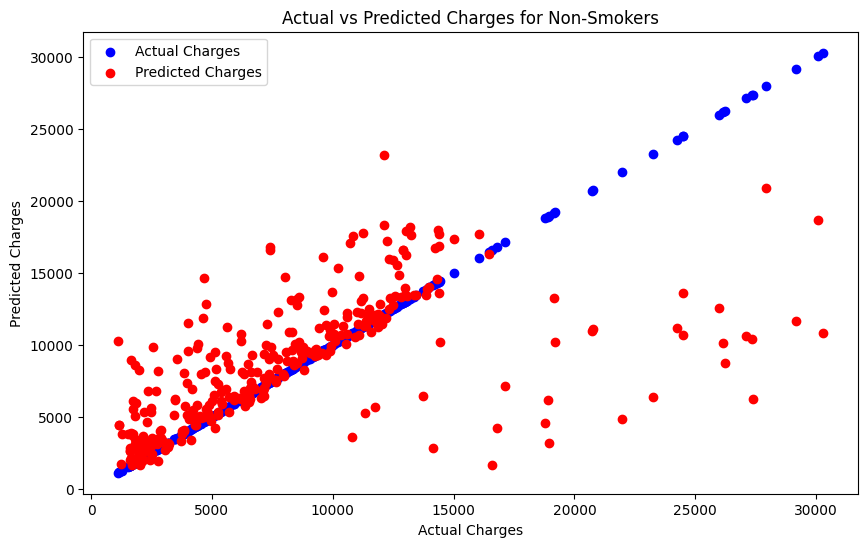

In [ ]:
# Scatter plot for non-smokers
plt.figure(figsize=(10, 6))
plt.scatter(y_non_smokers_test, y_non_smokers_test, color='blue', label='Actual Charges')
plt.scatter(y_non_smokers_test, predicted_charges_non_smokers, color='red', label='Predicted Charges')
plt.title('Actual vs Predicted Charges for Non-Smokers')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()


#Calculating and Plotting Residuals 

Residuals for Smokers:
117      365.149322
842      542.184031
989     -672.519997
623     -334.642038
1304   -2802.845894
           ...     
373      490.734071
545    -1392.015178
252     -533.361857
530      871.511720
1047    3608.758236
Name: charges, Length: 83, dtype: float64


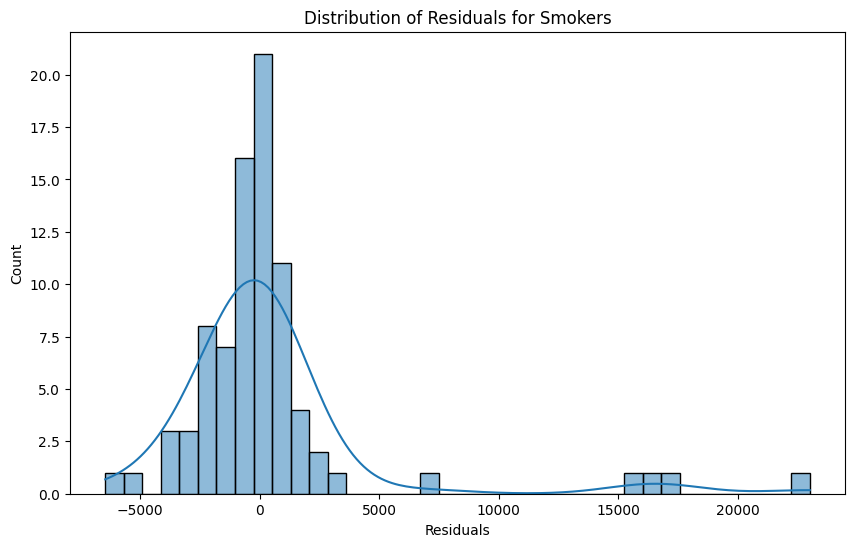

In [ ]:
# Calculate residuals for smokers
residuals_smokers = y_smokers_test - predicted_charges_smokers
# Print residuals for smokers
print("Residuals for Smokers:")
print(residuals_smokers)

# Distribution plot of residuals for smokers
plt.figure(figsize=(10, 6))
sns.histplot(residuals_smokers, kde=True)
plt.title('Distribution of Residuals for Smokers')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show()


Residuals for Non-Smokers:
41       221.027482
1326     729.317071
521    -5555.494927
930     -458.996001
991      663.765204
           ...     
614    -4069.629875
712    -1312.267586
482    -1023.491250
869    -5401.392350
442    -3264.860111
Name: charges, Length: 320, dtype: float64


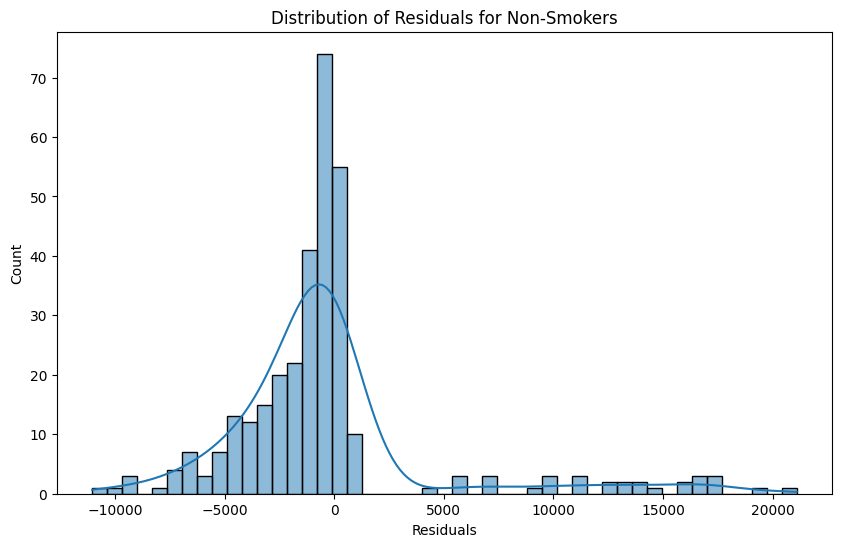

In [ ]:
# Calculate residuals for non-smokers
residuals_non_smokers = y_non_smokers_test - predicted_charges_non_smokers
# Print residuals for smokers
print("Residuals for Non-Smokers:")
print(residuals_non_smokers)

# Distribution plot of residuals for non-smokers
plt.figure(figsize=(10, 6))
sns.histplot(residuals_non_smokers, kde=True)
plt.title('Distribution of Residuals for Non-Smokers')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show()



#**Interpretation:**

#Statistical Inference:
**Correlation analysis:** The correlation matrix shows the degree and direction of the linear relationship between variables. In this case, we observe a moderate positive correlation between age and medical charges, suggesting that as age increases, medical charges tend to increase. There is a weak positive correlation between BMI and charges, indicating that higher BMI values may be associated with slightly higher charges. 

**Test 1: Gender and medical charges:** The chi-square test indicates that there is a significant association between gender and medical charges. Specifically, females tend to have higher charges on average than males. This finding suggests that gender plays a role in determining medical charges, with females potentially incurring higher costs compared to males.

**Test 2:** Age brackets and medical charges: By dividing the ages into brackets, we find that there is a moderate positive correlation between age and charges. This means that as individuals get older, their medical charges tend to increase. The average charges for different age brackets provide further evidence of this relationship, with older age groups having higher charges compared to younger age groups.

**Test 3: BMI distribution within gender:** 
The chi-square goodness-of-fit test reveals a significant association between BMI and gender. It suggests that the distribution of BMI values differs between males and females. Specifically, females have a higher proportion of individuals with obese BMI compared to males.

**Normality test:** The normality test assesses whether the distribution of charges follows a normal (Gaussian) distribution. The low p-value indicates that the charges' distribution significantly deviates from a normal distribution. The null hypothesis of normality is rejected.

The histogram of the 'charges' variable shows a right-skewed distribution, with a longer tail on the right side. The bell curve is overlaid on the histogram, and it visually highlights the discrepancies between the observed data and the expected normal distribution. This suggests that the 'charges' variable does not follow a perfect normal distribution.

**Influential points:** The influential points analysis identifies data points that have a significant impact on the regression model. The high Cook's distances and standardized residuals suggest that certain data points have a substantial influence on the model's estimated coefficients and predictions. 
The scatter plot shows the Cook's distances for each data point in the dataset. The red dots represent the influential points with high Cook's distances. 

**Residual correlation analysis:** The presence of a significant correlation between the residuals of the OLS model indicates the presence of residual patterns or relationships that are not captured by the model. This suggests that there may be some systematic variation in the residuals that is not accounted for, and additional factors or variables may need to be considered in the analysis.

The scatter plot of residuals at time t versus residuals at time t+1 shows no clear pattern or correlation between consecutive residuals. The correlation coefficient is close to zero, indicating a very weak negative correlation. The p-value suggests that this weak correlation is not statistically significant. 


#Split Train Test:
 This part of the project focused on examining the relationship between various factors and medical charges for both smokers and non-smokers. Separate regression models were developed for each group, and their performance was evaluated using metrics such as mean absolute error (MAE), mean squared error (MSE), R2 score, and the analysis of residuals.

For smokers, the regression model demonstrated strong predictive performance, as indicated by an R2 score of 0.8655. This means that approximately 86.55% of the variance in charges can be explained by the selected features. The MAE was 2118.64, indicating that, on average, the model's predictions deviated by $2118.64 from the actual charges. The MSE was 19761994.13, reflecting the average squared difference between the predicted and actual charges. The scatter plot comparing the actual charges with the predicted charges for smokers displayed a close alignment along the diagonal, suggesting a good fit between the predicted and actual values.

In contrast, the regression model for non-smokers exhibited a lower level of predictive performance, with an R2 score of 0.3135. This implies that only around 31.35% of the variance in charges could be explained by the selected features for non-smokers. The MAE was 2832.77, indicating that the average deviation between the model's predictions and the actual charges was $2832.77. The MSE was 23767274.21, representing the average squared difference between the predicted and actual charges. 

The scatter plot comparing the actual charges with the predicted charges for non-smokers showed a more scattered pattern, suggesting a weaker fit between the predicted and actual values.

The analysis of residuals provides further insights into the model's predictive accuracy. For smokers, the residuals appeared to be randomly distributed around zero, indicating that the model predictions were relatively close to the actual charges. On the other hand, the residuals for non-smokers exhibited a wider spread and displayed a non-random pattern, suggesting that the model struggled to accurately predict charges for this group.

These findings underscore the importance of considering smoking status as a significant factor in predicting medical charges. The regression model performed well for smokers, accurately capturing the relationship between the selected features and charges. However, for non-smokers, the model's performance was relatively weaker, indicating the presence of additional influential factors that were not accounted for by the chosen features.


In conclusion, this project highlights the significance of statistical analysis, data visualization, and model evaluation in the insurance industry. Through comprehensive examination of the data, we uncovered valuable insights and patterns. By considering multiple factors and conducting thorough testing, achieved accurate predictions and meaningful interpretations. The project underscores the importance of data-driven decision-making and provides valuable skills in statistical analysis, data visualization, and model evaluation for informed decision-making in the insurance sector.